In [7]:
%matplotlib inline
import matplotlib
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import *
import torchvision

0.0


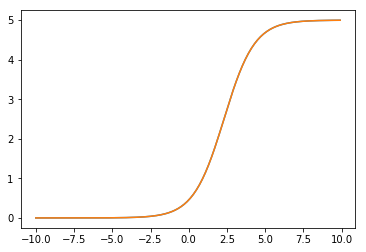

In [34]:
"""
Example to show that you can use PyTorch to do regression of other kind than Linear Regression (no way to represent it with linear regression here)

# TODO - use the formula of the differential logistic equation to find the parameter of M (max population), A (initial population), K (population growth factor)
# TODO - use PyTorch to do this
"""

def logistic(m, x, c):
    ex = torch.exp(x)
    return m * ex / (ex + c)

def plot(xs, expected, got):
    plt.plot(xs.detach().numpy(), expected.detach().numpy())
    plt.plot(xs.detach().numpy(), got.detach().numpy())
    plt.show()

# Expected
xs = torch.tensor(np.arange(-10, 10, 0.1), dtype=torch.float32, requires_grad=False)
m = torch.tensor([5], dtype=torch.float32, requires_grad=False)
c = torch.tensor([10], dtype=torch.float32, requires_grad=False)
expected = logistic(m, xs, c)

# Training
m = torch.tensor([1], dtype=torch.float32, requires_grad=True)
c = torch.tensor([1], dtype=torch.float32, requires_grad=True)

criterion = nn.MSELoss()
optimizer = optim.Adam([m, c], lr=1e-2)

for epoch in range(10_000):
    optimizer.zero_grad()
    got = logistic(m, xs, c)
    loss = criterion(got, expected)
    loss.backward()
    optimizer.step()

print(loss.item())
plot(xs, expected, got)